In [1]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
dataSetPath = r"..\1_DataSets\0_statLog_dataSet.csv"

dataset = pd.read_csv(dataSetPath)
dataSetName = os.path.basename(dataSetPath)


 
print(f"{dataSetName} Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"{dataSetName} Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

0_statLog_dataSet.csv Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
****************************
0_statLog_dataSet.csv Shape: (270, 14)
****************************
Total Rows in dataset File: 270


In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# Pre-Processing (Removing Nan and  Duplicates)

In [7]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")


Dataset Shape after removing duplcates: (270, 14)
****************************
Remaining Rows in Dataset: 270
****************************
Total Duplicates: 0
Remaining Rows in Dataset: 270
****************************
Removed Number of rows containing Null Values: 0


# Class Distribution check (imbalanced or balanced)

Target Class Distribution:
target
1    150
2    120
Name: count, dtype: int64


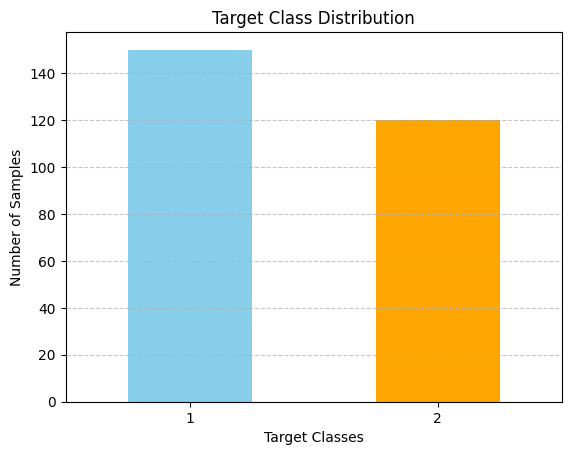

In [8]:
# Target Classes Distribution 
target_column = cleanedDataset.columns.to_list()[-1]

# Check the distribution of each target class
class_distribution = cleanedDataset[target_column].value_counts()

# Print the class distribution
print("Target Class Distribution:")
print(class_distribution)
  
# Bar plot of class distribution
class_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Label Encoding (Changing Categorical to Numerical)

In [10]:
labelEncodingAlgorithmFromScienceKit = LabelEncoder()

for col in cleanedDataset.select_dtypes(include=['object', 'category', 'bool', 'datetime']).columns:
    cleanedDataset[col] = cleanedDataset[col].str.lower()
    cleanedDataset[col] = cleanedDataset[col].str.strip()
    cleanedDataset[col] = labelEncodingAlgorithmFromScienceKit.fit_transform(cleanedDataset[col])
 

cleanedDataset.shape

cleanedDataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


# Correlation Matrix (Pearson, Spearman-Rank)

In [11]:
# Calculate Pearson correlation
pearson_corr = cleanedDataset.corr(method='pearson')

# Calculate Spearman correlation
spearman_corr = cleanedDataset.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)


Pearson Correlation:
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094401  0.096920  0.273053  0.220056  0.123458   
sex      -0.094401  1.000000  0.034636 -0.062693 -0.201647  0.042140   
cp        0.096920  0.034636  1.000000 -0.043196  0.090465 -0.098537   
trestbps  0.273053 -0.062693 -0.043196  1.000000  0.173019  0.155681   
chol      0.220056 -0.201647  0.090465  0.173019  1.000000  0.025186   
fbs       0.123458  0.042140 -0.098537  0.155681  0.025186  1.000000   
restecg   0.128171  0.039253  0.074325  0.116157  0.167652  0.053499   
thalach  -0.402215 -0.076101 -0.317682 -0.039136 -0.018739  0.022494   
exang     0.098297  0.180022  0.353160  0.082793  0.078243 -0.004107   
oldpeak   0.194234  0.097412  0.167244  0.222800  0.027709 -0.025538   
slope     0.159774  0.050545  0.136900  0.142472 -0.005755  0.044076   
ca        0.356081  0.086830  0.225890  0.085697  0.126541  0.123774   
thal      0.106100  0.391046  0.262659  0.

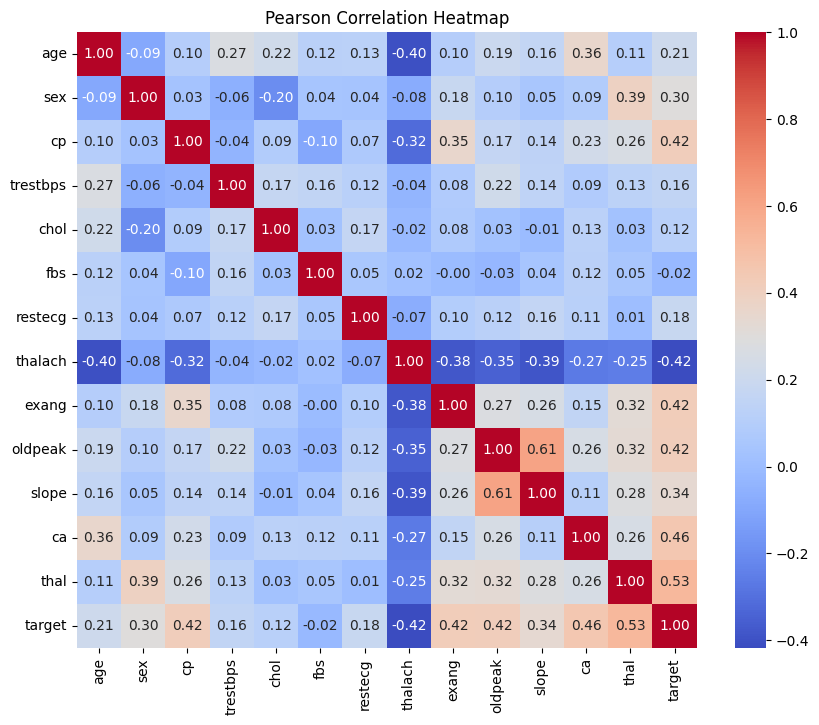

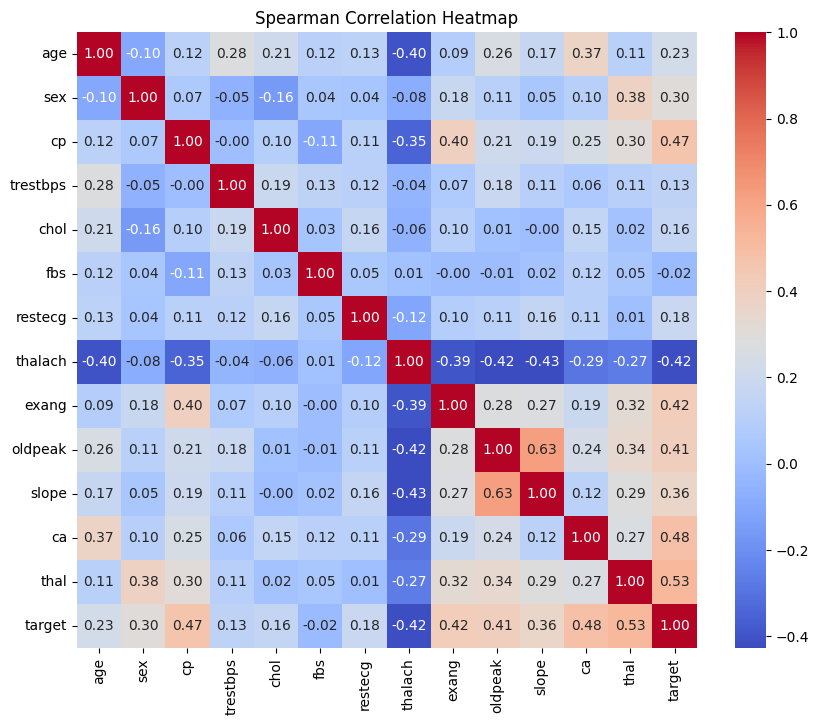

In [12]:

# Plot Pearson correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Plot Spearman correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()